<h1 align="center"><font size="5">Visual Results</font></h1>

This Jupyter Notebook has the purpose to plot the word graph after having processed an implementation of an algorithm for community detection. It serves also as a hands-on exercice by creating a new Jupyter Notebook from scratch.

### Table of contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#ref1">Acquiring the Data</a></li>
        <li><a href="#ref2">Graph theory plot</a></li>
        <li><a href="#ref3">Dendogram</a></li>
    </ol>
</div>
<br>

<a id="ref1"></a>
# Acquiring the Data

Managing the import

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import community as community_louvain
import networkx as nx
import plotly.figure_factory as ff
import plotly.io as pio

ModuleNotFoundError: No module named 'community'

Creating the dataframes

In [4]:
df_adjacency_matrix=pd.read_csv(r".\3.Word Matrices\WordsAdjacencyMatrix.csv",index_col=0)
df_words=pd.read_csv(r".\3.Word Matrices\WordsFrequencyShortened.csv",index_col=0)

Prepare the graph node labels

In [5]:
nodes_list=df_words.index.tolist()
nodes_labels=dict(zip(nodes_list,nodes_list))

<a id="ref2"></a>
# Graph theory plot

Let's observe the graph before managing the clustering. Note that the weights are not visible on the graph, but they are anyway stored in the object G.

In [6]:
G = nx.from_pandas_adjacency(df_adjacency_matrix)
G.name = 'Graph from pandas adjacency matrix'
print(nx.info(G))
nx.draw(G, node_size=500, with_labels=True)
plt.show()

NameError: name 'nx' is not defined

The "magic line" below will explore the graph to create the communities based on connections between nodes.

For more details, please see https://arxiv.org/pdf/0803.0476.pdf (paper describing the technique) and visit https://github.com/taynaud/python-louvain/blob/master/community/community_louvain.py (Python implementation of the technique based on networkx)

In [ ]:
partition = community_louvain.best_partition(G,resolution=0.2)#Play with resolution (max=1.0) in order to get less (higher number) or more communities (clusters)

Let us draw the graph again with colored clusters

NameError: name 'nx' is not defined

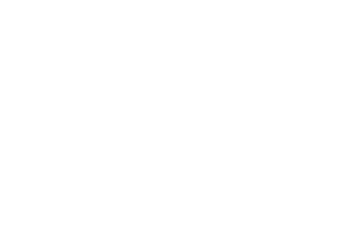

In [7]:
plt.axis('off')
pos = nx.spring_layout(G)

# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=20,
                       cmap=cmap, node_color=list(partition.values()))#node_color follows a perceptually uniform color theme [https://matplotlib.org/examples/color/colormaps_reference.html]
nx.draw_networkx_edges(G, pos, alpha=0.3)
nx.draw_networkx_labels(G, pos, nodes_labels, font_size=1, font_color='w')
plt.savefig(r".\4.Plots\graph.png", dpi=1000)
plt.show()

Even though we plotted the graph with clusters, work is not over yet. Indeed, it is necessary to save information about this clustering to use it later in order to create thematic vocabulary lists.

In [8]:
clusters=list(partition.values())
df_words["cluster_id"]=clusters
df_words.to_csv(r".\5.Vocabulary Lists\WordsFrequencyShortenedClustered.csv")
df_words.to_excel(r".\5.Vocabulary Lists\WordsFrequencyShortenedClustered.xlsx")

NameError: name 'partition' is not defined

<a id="ref3"></a>
# Dendogram

Another way to visualize the result is done through a dendogram.

In [9]:
dendogram = community_louvain.generate_dendrogram(G,resolution=0.2, part_init=partition)
label_dendogram=np.asarray(nodes_list)
array_dendogram=np.asarray([list(dendogram[0].values())])

fig = ff.create_dendrogram(array_dendogram,labels=nodes_list)
fig.update_layout(width=800, height=500)
pio.write_image(fig, r".\4.Plots\dendogram.png",scale=10)
# pio.write_image(fig, r".\4.Plots\dendogram.pdf")
# pio.write_image(fig, r".\4.Plots\dendogram.svg")
fig.show()

NameError: name 'community_louvain' is not defined